In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasist.structdata import detect_outliers
from geopy.distance import great_circle 

In [113]:
%matplotlib inline
sns.set(rc = {'figure.figsize' :[15,10]}, font_scale = 1.3)

In [114]:
df = pd.read_csv('Accidents.csv' ,na_values='?')


In [115]:
df.drop('Unnamed: 0',axis = 1 , inplace = True)


In [215]:
# df.head()

In [216]:
# df.info()

In [217]:
# df.describe()

In [218]:
# df.isnull().sum()

In [219]:
# df.duplicated().sum()

## Feature engineering 

[Datetime feature - String operations]

## Feature transformations

[Datacleaning - detect and handl outleirs - handl missing data (catigorical and numerical)]

## Viualisation

## 


## ----------------------------------------------------------------------------------------------------------------------------------

##  split datetime


In [121]:
df['Month_accident'] =pd.to_numeric(df['Start_Time'].apply(lambda x : x.split(' ')[0].split('-')[-2]))

In [122]:
df['Year_accident'] =df['Start_Time'].apply(lambda x :x.split(' ')[0].split('-')[0])

In [123]:
df['Day_accident']= df['Start_Time'].apply(lambda x : x.split(' ')[0])

In [220]:
# df.isna().sum()

## ----------------------------------------------------------------------------------------------------------------------------------

## Handle categorical missing value

In [221]:
obj = df.select_dtypes(include= 'object') 
# obj.columns

In [126]:
for x in obj.columns :
    df[x].fillna(df[x].mode()[0], inplace=True)

## ----------------------------------------------------------------------------------------------------------------------------------

# Handle numeric missing value 
By the median for each of the weather conditions shown below for each month

In [127]:
weather = ['Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)']
for i in range(1,13)  :
    for x in weather :
        df[x].fillna(df[df['Month_accident']==i].median()[x], inplace=True)

In [222]:
# df.isna().sum()

## ----------------------------------------------------------------------------------------------------------------------------------

## Remove Duplication

In [129]:
df.drop_duplicates(keep='first', inplace=True)

In [130]:
df.duplicated().sum()

0

## ----------------------------------------------------------------------------------------------------------------------------------


# Stringe oprations

In [131]:
# split Timezone
df['Timezone']=df['Timezone'].apply(lambda x : x.split('/')[-1])


## Find statename

In [132]:
#turn abbreviations of states into names
name_state={'CA':'california','WA':'Washington', 'GA': 'Georgia', 'FL':'Florida', 'MA':'Massachusetts', 'AR':'Arkansas', 'MI':'Michigan', 'TX':'Texas', 'NJ':'New Jersey', 'IL':'Illinois', 'VA':'Virginia',
       'LA':'Louisiane', 'OH':'Ohio', 'OR':'Oregon', 'AZ':'Arizona', 'TN':'Tennessee', 'MD':'Maryland', 'PA':'Pennsylvania', 'RI':'Rhode Island', 'SC':'South Carolina', 'NY':'New York', 'DC':'Washington ciptal',
       'NC':'North Carolina', 'MN':'Minnesota', 'IA':'Iowa', 'ID':'Idaho', 'AL':'Alabama', 'CO':'Colorado', 'MO':'Missouri', 'NE':'Nebraska', 'UT':'utah', 'MS':'Mississippi', 'WI':'Wisconsin',
       'IN':'Indiana', 'CT':'Connecticut', 'MT':'Montana', 'NM':'New Mexico', 'NH':'New Hampshire', 'WV':'West Virginia', 'KY':'Kentucky', 'OK':'Oklahoma', 'ME':'Maine', 'KS':'Kansas', 'NV':'Nevada',
       'ND':'North Dakota', 'DE':'Delaware', 'WY':'Wyoming', 'SD':'South Dakota', 'VT':'Vermont'}

In [134]:
def ask (x) :
    return name_state[x]

In [135]:
#df.isnull().sum()

In [136]:
df['State_name']= df['State'].apply(ask)

## ----------------------------------------------------------------------------------------------------------------------------------

## Find season

In [137]:
def season(x):
    if x in (12,1,2):
        return 'Winter'
    elif x in (3,4,5):
        return 'Spring'
    elif x in (6,7,8,9):  
        return 'Summer'
    elif x in (10,11):
        return 'Fall'

In [138]:
df['season_year'] = df['Month_accident'].apply(season)   

## ----------------------------------------------------------------------------------------------------------------------------------

## Find distance

In [139]:
from geopy.distance import great_circle
import math

In [140]:
def distance (x): 
    lat = x['Start_Lat']
    lan = x['Start_Lng']
    start = (lat,lan)
    lat1 = x['End_Lat']
    lan1 = x['End_Lng']
    end = (lat1,lan1)
    return math.floor(great_circle(start,end).m)
    

In [223]:
df['distance(m)'] = df.apply(distance ,axis = 1)
# df['distance(m)'] 

## ----------------------------------------------------------------------------------------------------------------------------------

## Turn into datetime
find duration 

In [142]:
def ask ():
    col = ['Weather_Timestamp','Start_Time','End_Time']
    for i in col :
        df[i]=pd.to_datetime(df[i])

In [143]:
ask ()

## ----------------------------------------------------------------------------------------------------------------------------------

## Find Duration 

In [144]:
df['Duration(m)'] = (df['End_Time']-df['Start_Time']) /np.timedelta64(1,'m')

In [145]:
df['Duration(m)']=df['Duration(m)'].apply(lambda x : math.floor(x) )

## ----------------------------------------------------------------------------------------------------------------------------------


## Creat Timeday Column

In [146]:
df['Hour_accident']= df['Start_Time'].apply(lambda x : x.hour)

In [147]:
def day(x):
    if x in [1,2,3,4,5]  :
        return 'Daybreak'
    elif x in [6,7,8,9,10,11] :
        return 'Morning'
    elif x in [12,13,14,15,16,17] :
        return 'Afternoon'
    elif x in [18,19,20,21,22,23,0] :
        return 'Night'
    else : 
        return None


In [148]:
df['Timeday']=df['Hour_accident'].apply(day)

## ----------------------------------------------------------------------------------------------------------------------------------

## Handl outliers.
1- Duration

2- distance


In [149]:
out= [ 'distance(m)', 'Duration(m)']

In [150]:
for i in out :
    outleir = detect_outliers(df,0,[i])
    df.drop (outleir, axis = 0 , inplace = True)

In [151]:
#sns.boxplot(data = df , x ='distance(m)' )


# 
becauseof the little number of 2016 , 2017 which effects on data as outliers 
make those drop

In [152]:
years= ['2016','2017']
for x in years :
    indx = df[df['Year_accident'] == x ].index
    df.drop(indx,axis = 0 , inplace = True)


In [153]:
df['Description']

0         Incident on SW 120TH ST WB near SW 128TH AVE D...
1         Incident on GLEN MARTIN LN near GARRISON RD Dr...
2           At W Michigan St - Accident investigation work.
3         Incident on IMPERIAL DR near IMPERIAL DR Drive...
4         Incident on PHILADELPHIA DR near VALERIE ARMS ...
                                ...                        
199995                       At Stone Valley Rd - Accident.
199996    Incident on N DEAN RD near LAKE GEORGIA DR Dri...
199997           At Choctaw Rd/Exit 166 - Earlier accident.
199998                            At SW 89th St - Accident.
199999    Incident on SW 103RD AVE near HOUSE 8226 Expec...
Name: Description, Length: 199599, dtype: object

## Explore Column of Description data 
Perhaps the description column seems to be the most complex in the columns because of the length and unbalance of the text and it contains capital and small words.
it is possible to find out if the cause of the traffic disruption is an accident or an incident such as

# Note

Accident : is a sudden event that resulted in material and human losses

Incident : is a sudden event that Not resulted in material and human losses

In [154]:
duplacted_words_accident = ['accident','Accident.','accident.',
                   'accidents','accidents.','Crash','crash','(Crash)'
                   'crash.','Directions.','directions','Both','both','vehicle.','Closed'
                   'Vehicle','vehicle','overturned','Overturned','collision.','Collision','collision','VS','closed'
                  'Injuries' ,'injuries' ,'injuries.','EXIT' , 'exit' ,'EXIT.', 'exit.','OPEN',
                   'open.','OPEN.','inner.','blocking.','Blocking','BLOCKING','[Appended',
                  'VEHS' ,'VEH','VEHICLE','OVERTURN','BOTH','ACCIDENT','Accident']

duplacted_words_Incident = ['Use','Incident','Incident.','incident','incident','caution','caution'
,'Construction','construction','construction.','[Rotation','[Rotation Request Comment]','rotation','[Notification]','Notification'
,'OUTER','INNER','outer','inner','Inner','loop','BLOCK','BLOCKED', 'BLOCK','BLOCKED','BLOCKED.','BLOCK.','BLOCKs'
,'BLKNG.','NORTH','SOUTH','SPUN','1039','Between','BETWEEN','NORTH/SOUTH','Loop','between','CLOSED','closure','[Shared]',
                           'Exits','ACCIDENT','INCINDENT','Exit','BLKNG','Southbound','Northbound']
                        

In [155]:
def ask (x):
    d= x.split(' ')
    for  z , i in zip(duplacted_words_accident,duplacted_words_Incident) :
        if z in d :
            return 'Accident'
        elif i in d :
            return 'Incident'
        else :
            continue

In [156]:
#creat a new column
df['Descripe'] = df['Description'].apply(ask)

In [157]:
#drop null 
df['Descripe'].isna().sum()

2605

In [158]:
df.fillna(df['Descripe'].mode()[0], inplace=True)

## ----------------------------------------------------------------------------------------------------------------------------------

## Questions and Visual answers


## --------------------------------

## 1- How can the severity of the impact be determined?
## !!!!
The encoding(1,2,3,4) of the level of danger is determined based on the magnitude of the impact of the accident on traffic,
such as the distance stopped on the road and the time period until the effects of the accident are removed.

1.mean of distance for each code (1,2,3,4).

2.mean of duration for each code (1,2,3,4).

In [159]:
sum_of_ditances = df.groupby('Severity').sum()['distance(m)'].to_frame('sum_of_dist')
count_of_ditances = df.groupby('Severity').count()['distance(m)'].to_frame('count_of_dist')
count_of_ditances

,count_of_dist
Severity,
1,3130
2,182888
3,8189
4,5392


In [225]:
mean_of_durt= df.groupby('Severity').mean()['Duration(m)'].to_frame('Average duration(m)')
mean_of_durt['Average duration(m)']=mean_of_durt['Average duration(m)'].apply(lambda x : math.floor(x) )
# mean_of_durt

In [224]:
frame = pd.concat([sum_of_ditances,count_of_ditances,mean_of_durt],axis=1)
frame['Average distance(m)']=frame['sum_of_dist']/frame['count_of_dist']
frame['Average distance(m)']=frame['Average distance(m)'].apply(lambda x :math.floor(x))
frame.drop(['count_of_dist','sum_of_dist'],axis= 1,inplace = True)
frame['code']=frame.index
frame['code']= frame['code'].apply(lambda x :str(x))
# frame

In [229]:
# sns.barplot(data = frame,y='Average duration(m)',x = 'code')

In [227]:
# sns.barplot(data = frame,y='Average distance(m)',x = 'code')

## ----------------------------------------------------------------------------------------------------------------------------------

## 2- the most 10 streets has accident

In [164]:
df['Street'].value_counts().sort_values(ascending = False ).head(10).index
st= df['Street'].value_counts().sort_values(ascending = False ).head(10).to_frame('num_accident')
st['Street']=df['Street'].value_counts().sort_values(ascending = False ).head(10).index


In [228]:
# sns.barplot(data = st , x= 'Street',y= 'num_accident', hue_order ='num_accident' )

## ----------------------------------------------------------------------------------------------------------------------------------

## 3 -  the most Severity has accidents in Timezone

<AxesSubplot:xlabel='Timezone', ylabel='count'>

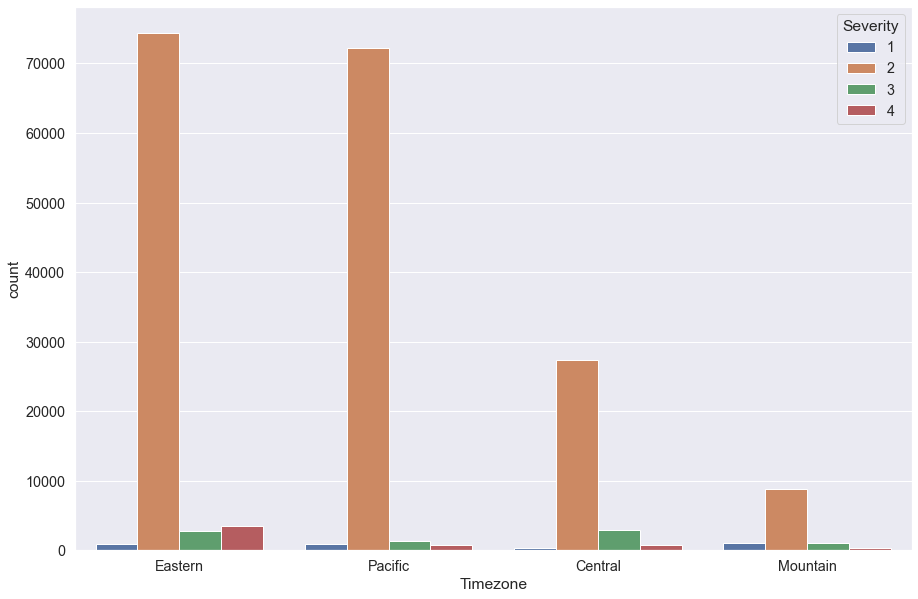

In [166]:
# sns.countplot(data = df ,x= 'Timezone', hue ='Severity' )

## ----------------------------------------------------------------------------------------------------------------------------------

## 4- Which the Most 5 states has more accidents?


In [167]:
s_5= df['State_name'].value_counts().head().to_frame()
s_5['State'] =s_5.index
s_5['number of accidents'] =s_5['State_name']


<AxesSubplot:xlabel='number of accidents', ylabel='State'>

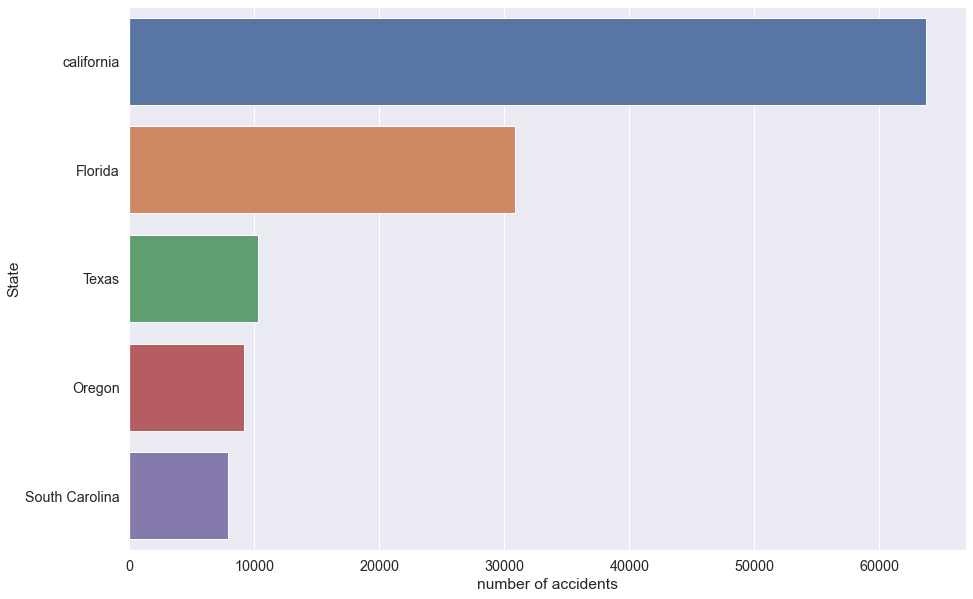

In [168]:
sns.barplot(data = s_5 , y= 'State' , x = 'number of accidents')

## ----------------------------------------------------------------------------------------------------------------------------------

## 5 - the median of weathercoditions for each one of the Most 5 states has more accidents?
['Temperature(F)'                      
,'Humidity(%)'              
,'Pressure(in)'             
,'Visibility(mi)'                    
,'Wind_Speed(mph)'          
,'Precipitation(in)']

s_5

In [169]:
top_5=['california','Florida','Texas','Oregon','Virginia']
conditions= ['Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)']
tem= []
hum=[]
pre=[]
vis=[]
win=[]

In [170]:
for x in top_5 :
    s= df.groupby(df['State_name']== x ).median()['Temperature(F)'][1]
    tem.append(s)
for x in top_5 :
    s= df.groupby(df['State_name']== x ).median()['Humidity(%)'][1]
    hum.append(s)
for x in top_5 :
    s= df.groupby(df['State_name']== x ).median()['Pressure(in)'][1]
    pre.append(s)
for x in top_5 :
    s= df.groupby(df['State_name']== x ).median()['Visibility(mi)'][1]
    vis.append(s)
for x in top_5 :
    s= df.groupby(df['State_name']== x ).median()['Wind_Speed(mph)'][1]
    win.append(s)


# 
create columns contains the median for each one of weatherconditions of

s_5 (five states)

In [171]:
s_5['temp']=tem
s_5['Humidity']=hum
s_5['Pressure']=pre
s_5['Visibility']=vis
s_5['Wind_Speed']=win

## ----------------------------------------------------------------------------------------------------------------------------------


## 6- Average  weather conditions  in the states along year?


<AxesSubplot:xlabel='temp', ylabel='State'>

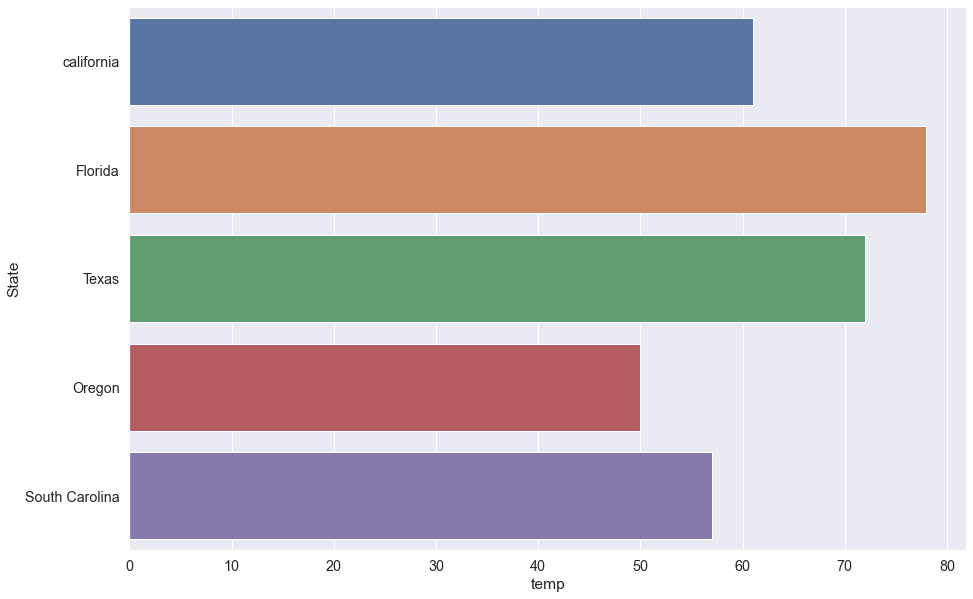

In [172]:
sns.barplot(data =s_5,y= 'State' , x = 'temp'  )

<AxesSubplot:xlabel='State', ylabel='Visibility'>

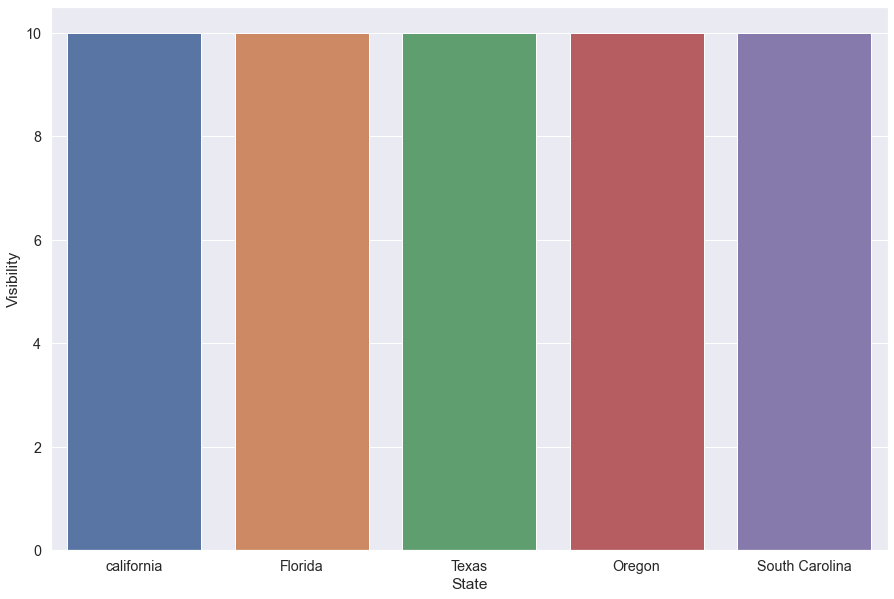

In [173]:
sns.barplot(data = s_5,x= 'State' , y = 'Visibility'  )

<AxesSubplot:xlabel='State', ylabel='Wind_Speed'>

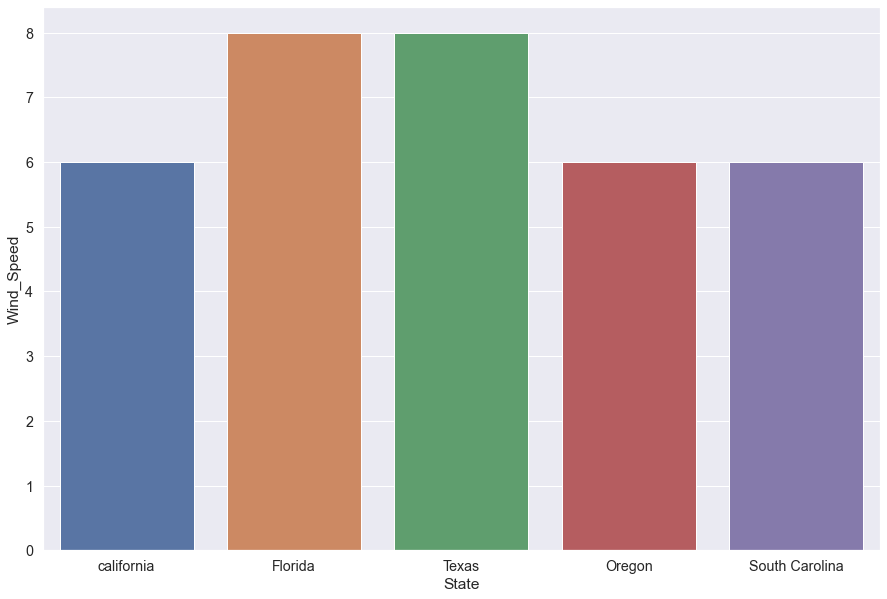

In [174]:
sns.barplot(data =s_5,x= 'State' , y = 'Wind_Speed'  )

<AxesSubplot:xlabel='State', ylabel='Pressure'>

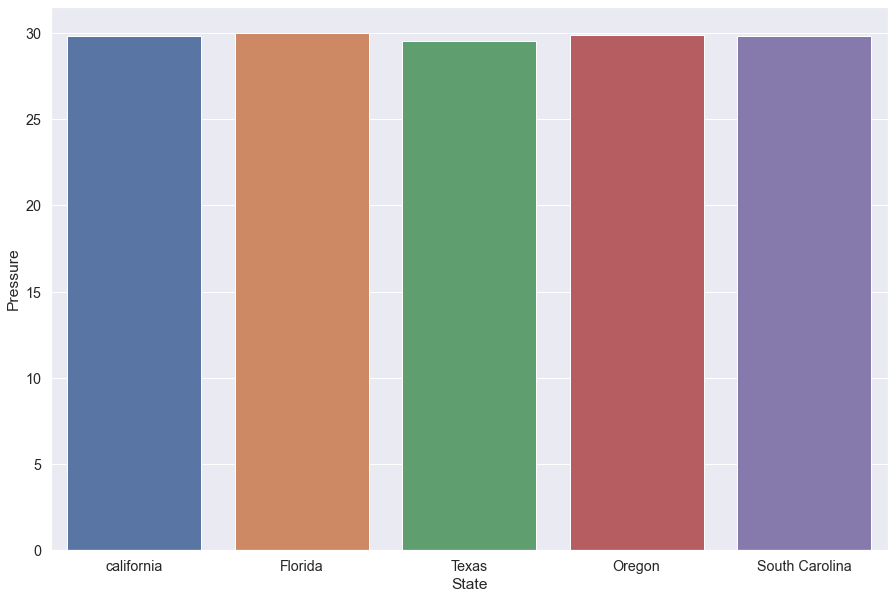

In [175]:
sns.barplot(data = s_5,x= 'State' , y = 'Pressure'  )

<AxesSubplot:xlabel='State', ylabel='Humidity'>

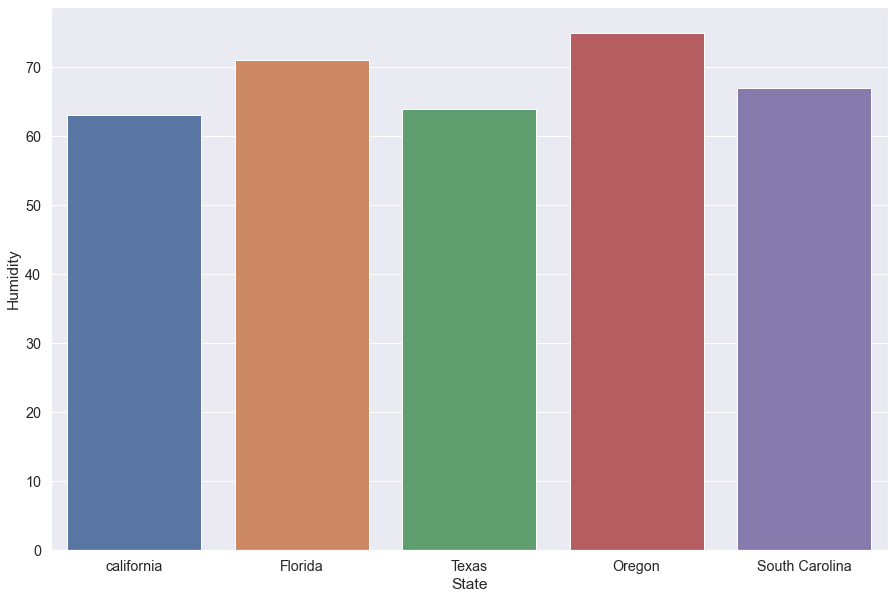

In [176]:
sns.barplot(data = s_5,x= 'State' , y = 'Humidity'  )

## ----------------------------------------------------------------------------------------------------------------------------------


## 7 - Which the Most season has more accidents?

<AxesSubplot:xlabel='Year_accident', ylabel='count'>

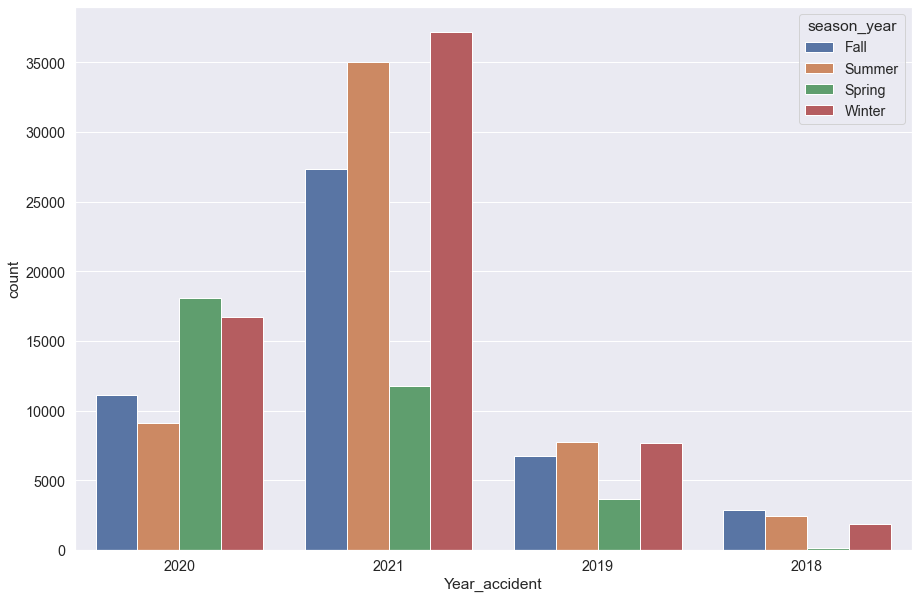

In [177]:
sns.countplot(data = df , hue = 'season_year', x ='Year_accident' )

## ----------------------------------------------------------------------------------------------------------------------------------


## 8 - Which the Most 10  streets  has more accidents?

In [178]:
st= df['Street'].value_counts().sort_values(ascending = False ).head(10).to_frame('num_accident')
st['Street'] = st.index
st

,num_accident,Street
I-5 N,2279,I-5 N
I-5 S,1918,I-5 S
I-10 E,1278,I-10 E
I-10 W,1236,I-10 W
I-95 N,1145,I-95 N
I-95 S,1029,I-95 S
I-80 E,962,I-80 E
I-80 W,847,I-80 W
I-405 N,814,I-405 N
I-15 N,727,I-15 N


<AxesSubplot:xlabel='Street', ylabel='num_accident'>

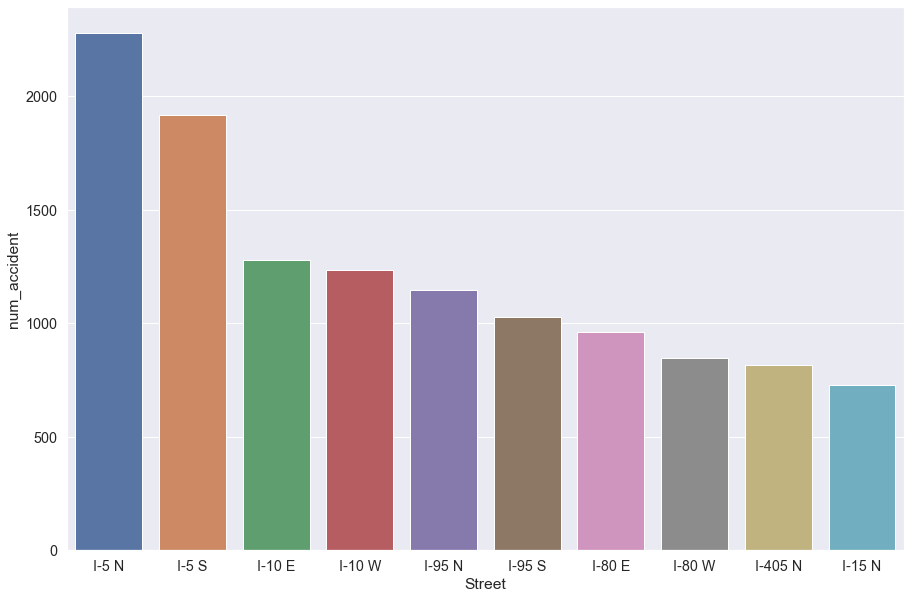

In [179]:
sns.barplot(data = st,y='num_accident',x='Street')

## 9 - the Severity throughout years

<AxesSubplot:xlabel='Year_accident', ylabel='count'>

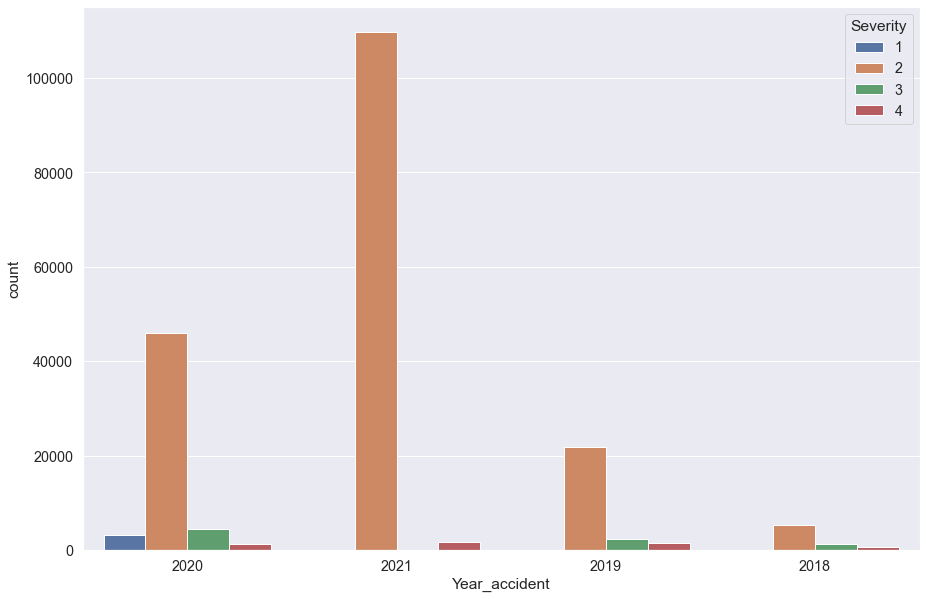

In [180]:
sns.countplot(data = df , hue = 'Severity', x ='Year_accident' )

## ----------------------------------------------------------------------------------------------------------------------------------


## 10 -  what is the average of the Most 10 WeatherConditions has more high Severity?

In [181]:
weather_Severity= df.groupby('Weather_Condition').mean()['Severity'].sort_values(ascending = False ).head(20).to_frame('Avg_severity')
weather_Severity['weather_Severity']=weather_Severity.index


<AxesSubplot:xlabel='Avg_severity', ylabel='weather_Severity'>

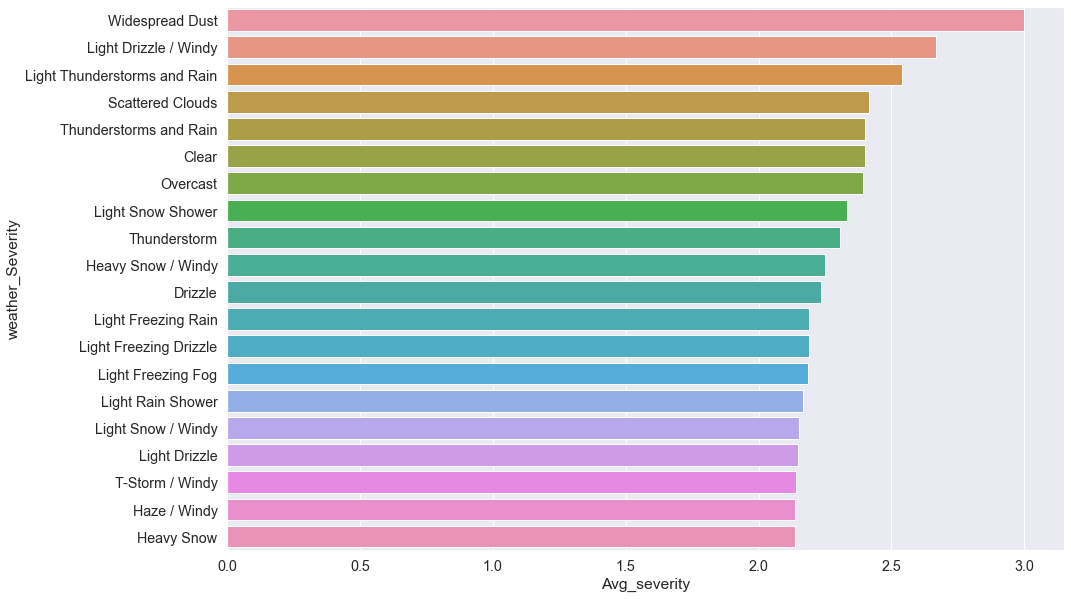

In [182]:
sns.barplot(data = weather_Severity , y = 'weather_Severity', x ='Avg_severity' )

## ----------------------------------------------------------------------------------------------------------------------------------


## 11 -  what is the Most  20  Airport_Code has more accidents?

In [183]:
st1= df['Airport_Code'].value_counts().sort_values(ascending = False ).head(10).to_frame('num_accident')
st1['Airport_Code']=df['Airport_Code'].value_counts().sort_values(ascending = False ).head(10).index


<AxesSubplot:xlabel='num_accident', ylabel='Airport_Code'>

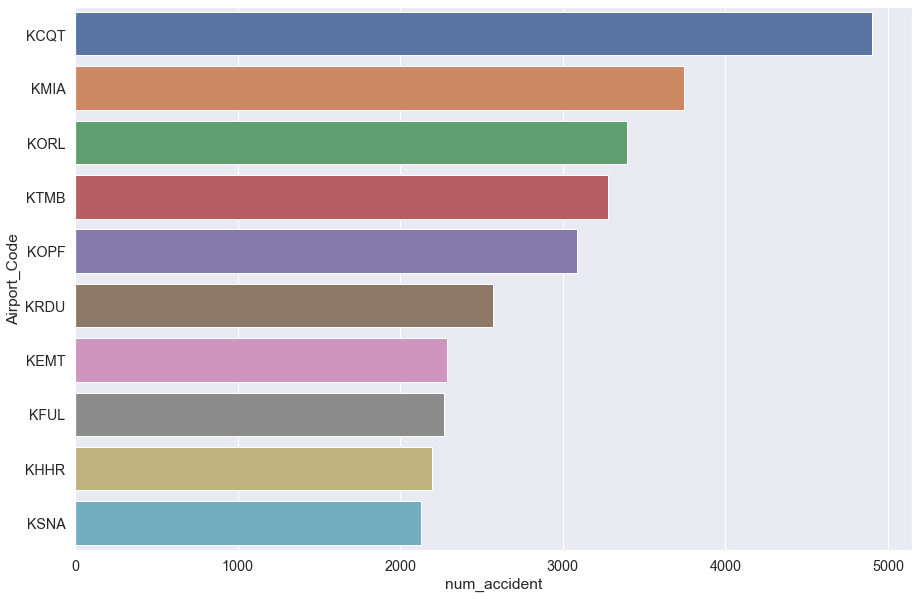

In [184]:
sns.barplot(data = st1 , y= 'Airport_Code',x= 'num_accident', hue_order ='num_accident' )

## ----------------------------------------------------------------------------------------------------------------------------------


## 12 -  does the incidents has affects last 5 years?

<AxesSubplot:xlabel='Year_accident', ylabel='count'>

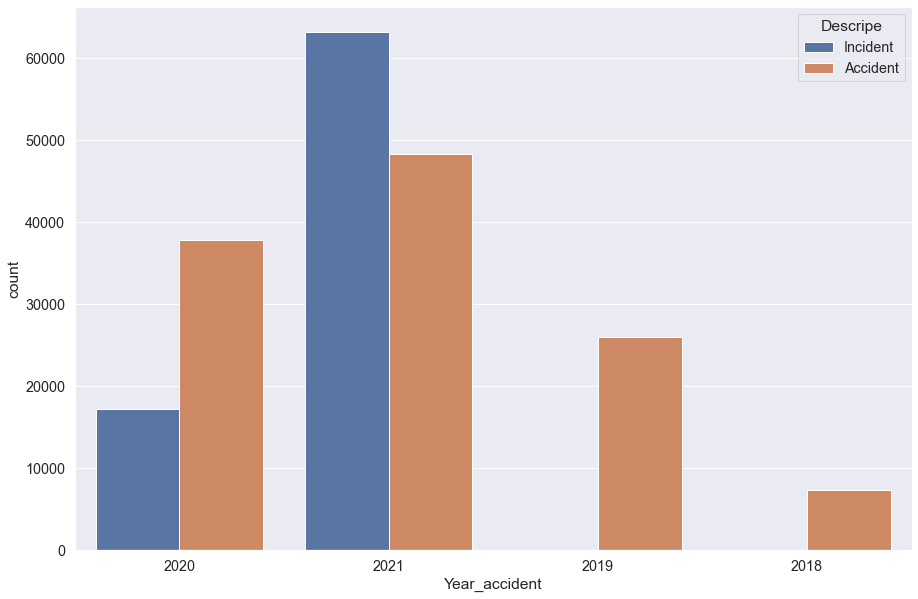

In [185]:
sns.countplot(data = df , hue = 'Descripe', x = 'Year_accident' )

## ----------------------------------------------------------------------------------------------------------------------------------


## 13 -  does the incidents equal  the accidents in seasons?

<AxesSubplot:xlabel='season_year', ylabel='count'>

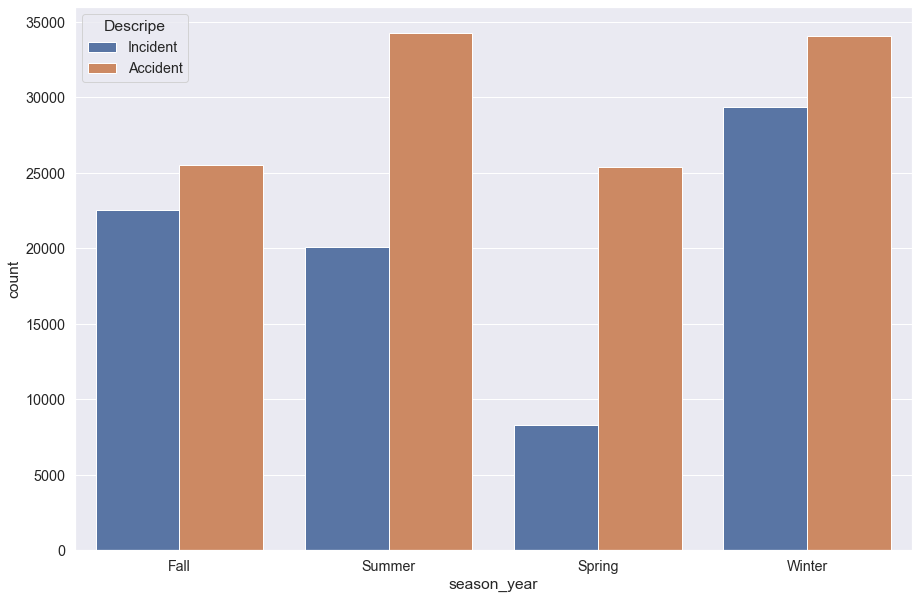

In [186]:
sns.countplot(data = df , hue = 'Descripe', x  ='season_year' )

## ----------------------------------------------------------------------------------------------------------------------------------


## 14 -  Average Duration for Incident and  Accident

In [187]:
df[df['Descripe']=='Accident']['Duration(m)'].mean()

88.51739892194587

In [188]:
df[df['Descripe']=='Incident']['Duration(m)'].mean()

110.32613622213921

## ----------------------------------------------------------------------------------------------------------------------------------


## 15 - Average distance for Incident and  Accident

In [189]:
df[df['Descripe']=='Incident']['distance(m)'].mean()

223.1908728676379

In [190]:
df[df['Descripe']=='Accident']['distance(m)'].mean()

216.82919632153846

## ----------------------------------------------------------------------------------------------------------------------------------


## 16 - does the top ten streets has more Incident than Accident or  not !?

In [191]:
st= df['Street'].value_counts().sort_values(ascending = False ).head(10).to_frame('Total_accident')
st['Street'] = st.index
st['Accident'] = None
st['Incident'] = None


In [192]:
Accident = []
Incident = []
f = []
for i in list(st['Street']) :
    Ac = df[df['Street']==i]['Descripe'].value_counts()['Accident']
    Accident.append(Ac)
    In = df[df['Street']==i]['Descripe'].value_counts()['Incident']
    Incident.append(In)
    f.append(i)

In [193]:
st['Incident'] = Incident
st['Accident'] = Accident

<AxesSubplot:xlabel='Incident', ylabel='Accident'>

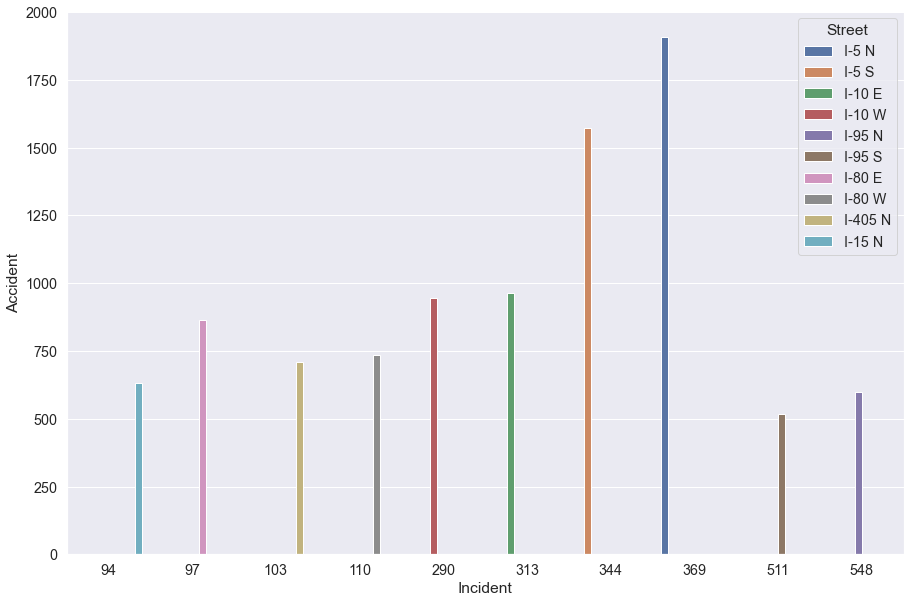

In [194]:
sns.barplot(data =st , hue ='Street',y='Accident' ,x= 'Incident')

## ----------------------------------------------------------------------------------------------------------------------------------


## 17 -  which season and month has more accident in 2021

In [195]:
df['Year_accident'].value_counts()

2021    111281
2020     55041
2019     25993
2018      7284
Name: Year_accident, dtype: int64

In [196]:
season = df[df['Year_accident'] == '2021' ]['season_year'].value_counts().sort_values(ascending = False ).to_frame('season')
season['count_acci'] = season.index


<AxesSubplot:xlabel='count_acci', ylabel='season'>

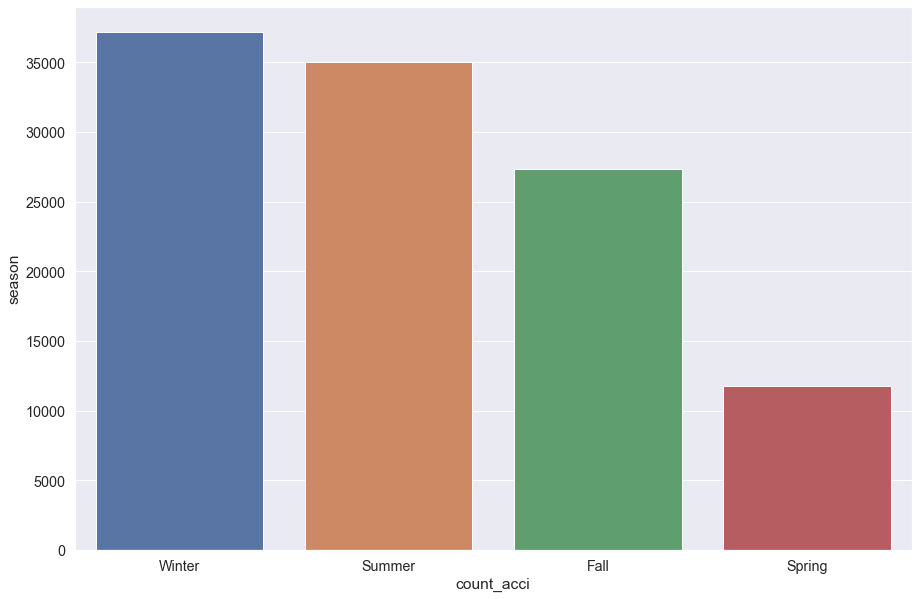

In [197]:
sns.barplot(data = season , y= 'season' , x ='count_acci')

## ----------------------------------------------------------------------------------------------------------------------------------


## 18-  which the most Timeday  has more accident in full 2021 year


<AxesSubplot:xlabel='season_year', ylabel='count'>

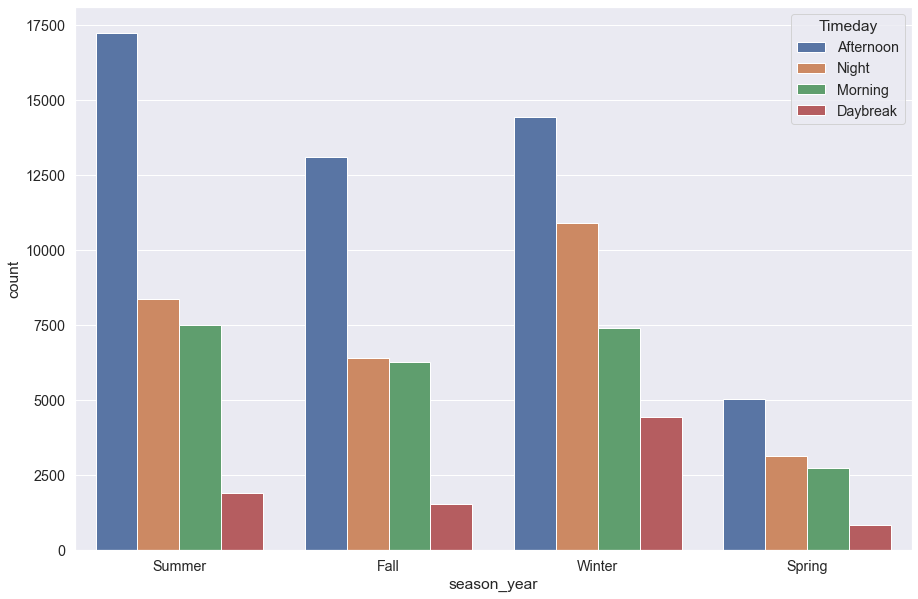

In [198]:
y_acci = df[df['Year_accident']== '2021' ]
sns.countplot(data  = y_acci ,hue = 'Timeday',x='season_year')

## ----------------------------------------------------------------------------------------------------------------------------------


## 19-  what the median for each one Timedays has more accident in full 2021 year

In [199]:
data = df[df['Year_accident']== '2021' ]

In [200]:
heat = data.pivot_table(values= 'distance(m)',index='Month_accident',columns='Timeday', aggfunc='median')
heat

Timeday,Afternoon,Daybreak,Morning,Night
Month_accident,,,,
1,192.0,149.0,171.0,141.5
2,158.0,173.0,182.0,139.0
3,177.0,237.0,195.0,168.5
4,153.0,199.0,178.0,155.0
5,181.0,201.5,211.0,170.0
6,220.0,234.0,216.0,212.5
7,221.0,244.5,208.0,197.5
8,217.0,181.0,208.0,182.0
9,217.0,218.0,206.0,178.0


<AxesSubplot:xlabel='Timeday', ylabel='Month_accident'>

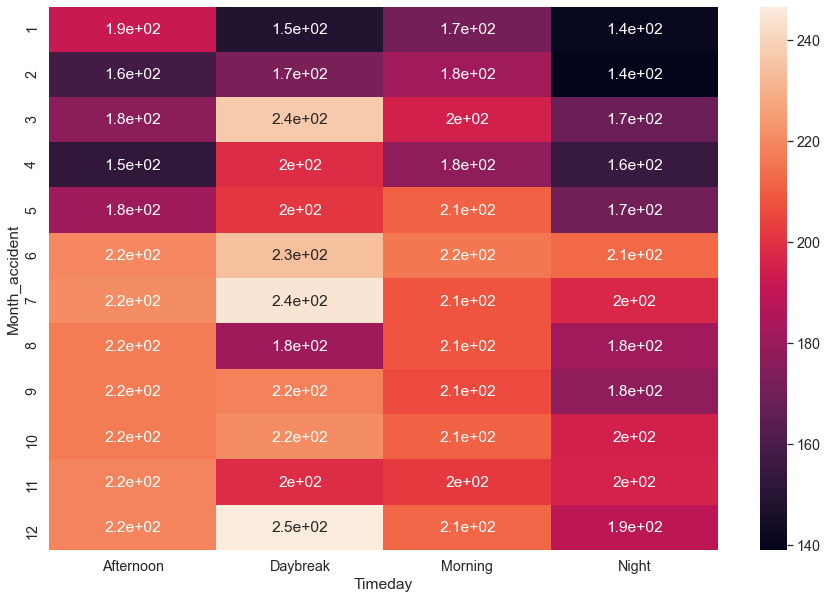

In [201]:
sns.heatmap(data = heat,annot = True )

## ----------------------------------------------------------------------------------------------------------------------------------


## 20- Explain how Miami City looks in the day 

In [202]:
df[df['City']== 'Miami' ]['Timeday'].value_counts()

Afternoon    4548
Night        1968
Morning      1820
Daybreak      489
Name: Timeday, dtype: int64

<AxesSubplot:xlabel='Descripe', ylabel='count'>

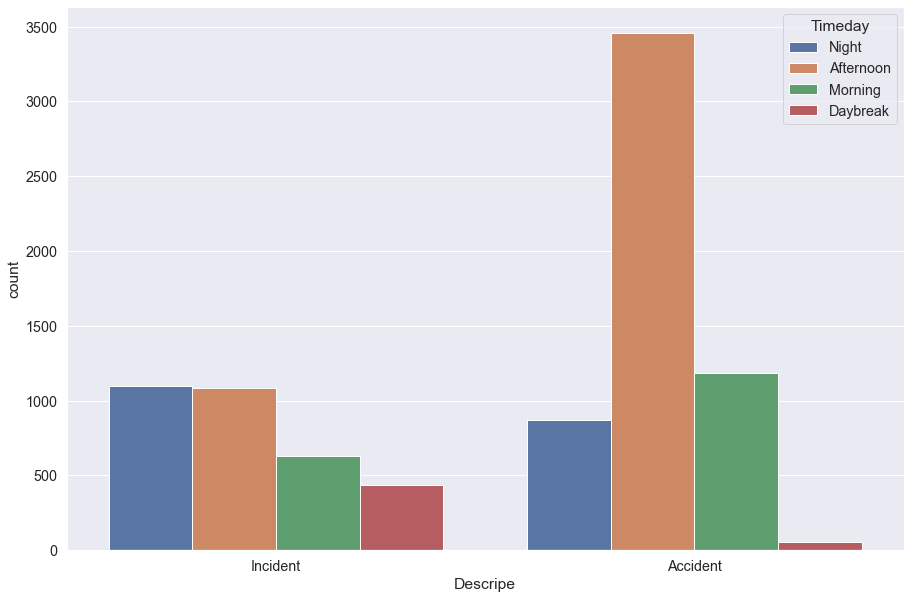

In [203]:
sns.countplot(data = df[df['City']== 'Miami' ] ,hue = 'Timeday' ,x= 'Descripe')

## ----------------------------------------------------------------------------------------------------------------------------------


## 21- How many the states that I-5 N road is crossing through it ??

In [204]:
Street = df[df['Street']=='I-5 N']['State_name'].value_counts().to_frame('Num_acc')
Street['states'] = Street.index
Street

,Num_acc,states
california,1307,california
Oregon,774,Oregon
Washington,197,Washington
South Carolina,1,South Carolina


<AxesSubplot:xlabel='states', ylabel='Num_acc'>

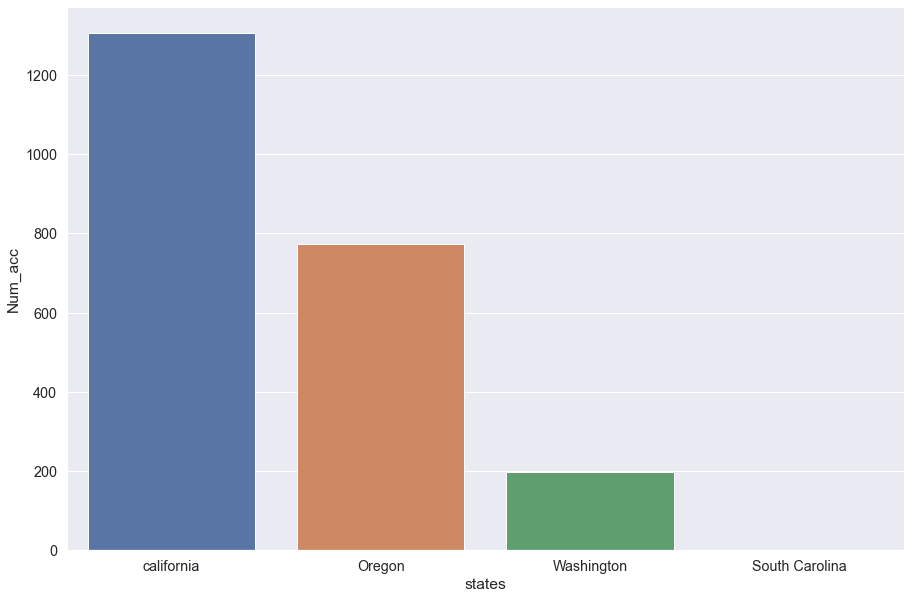

In [205]:
sns.barplot(data =Street,y = 'Num_acc' , x = 'states')

## ----------------------------------------------------------------------------------------------------------------------------------


## 22- Top 10 streets has L and R side accident 

In [206]:
top_R= df[df['Side']=='R']['Street'].value_counts().sort_values(ascending = False ).head(10).to_frame('Total_accident')
top_R['Street'] = top_R.index
top_R

,Total_accident,Street
I-5 N,2279,I-5 N
I-5 S,1918,I-5 S
I-10 E,1278,I-10 E
I-10 W,1236,I-10 W
I-95 N,1145,I-95 N
I-95 S,1029,I-95 S
I-80 E,962,I-80 E
I-80 W,847,I-80 W
I-405 N,814,I-405 N
I-15 N,727,I-15 N


In [207]:
top_L= df[df['Side']=='L']['Street'].value_counts().sort_values(ascending = False ).head(10).to_frame('Total_accident')
top_L['Street'] = top_L.index
top_L

,Total_accident,Street
SW 88th St,162,SW 88th St
W Flagler St,161,W Flagler St
Biscayne Blvd,159,Biscayne Blvd
SW 117th Ave,152,SW 117th Ave
SW 137th Ave,152,SW 137th Ave
Highway 101,142,Highway 101
S Dixie Hwy,142,S Dixie Hwy
Glenwood Ave,137,Glenwood Ave
NW 27th Ave,120,NW 27th Ave
S Tamiami Trl,115,S Tamiami Trl


<AxesSubplot:xlabel='Total_accident', ylabel='Street'>

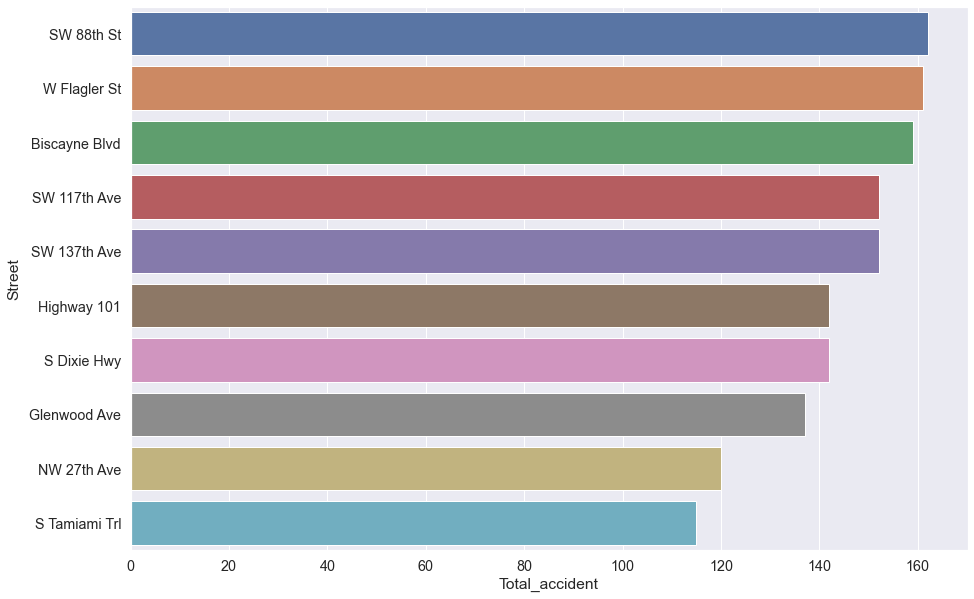

In [208]:
sns.barplot(data =top_L,x = 'Total_accident' , y = 'Street')

<AxesSubplot:xlabel='Total_accident', ylabel='Street'>

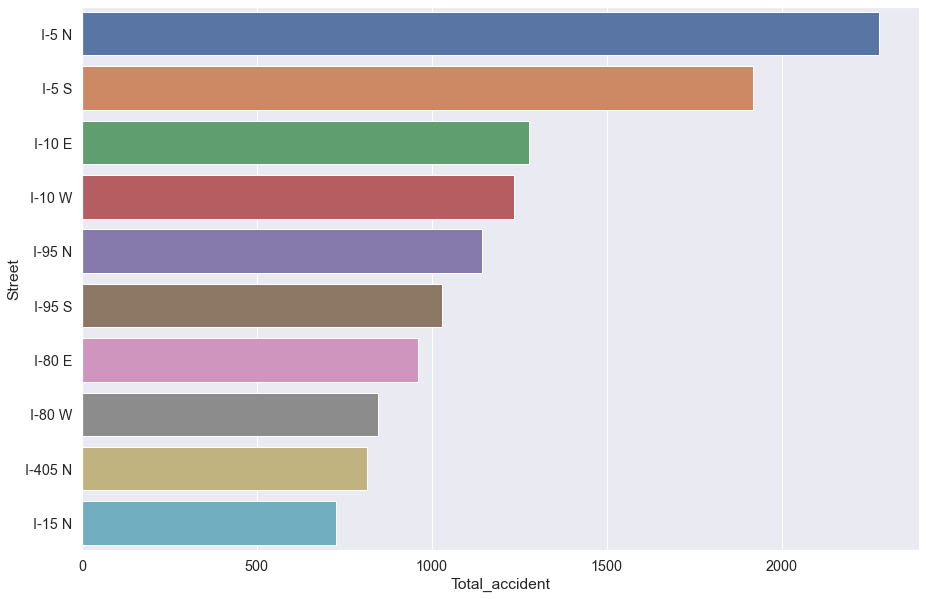

In [209]:
sns.barplot(data =top_R,x = 'Total_accident' , y = 'Street')

## ----------------------------------------------------------------------------------------------------------------------------------


## 23- does the weather conditions have correlation

In [210]:
df1 = df[['Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)']]
df1.corr()

,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
Temperature(F),1.000000,0.960843,-0.391043,0.116161,0.198018,0.115480,-0.005146
Wind_Chill(F),0.960843,1.000000,-0.361988,0.107362,0.192051,0.060813,-0.005241
Humidity(%),-0.391043,-0.361988,1.000000,0.179730,-0.347904,-0.185784,0.142743
Pressure(in),0.116161,0.107362,0.179730,1.000000,0.007657,-0.059976,0.007023
Visibility(mi),0.198018,0.192051,-0.347904,0.007657,1.000000,0.047883,-0.209410
Wind_Speed(mph),0.115480,0.060813,-0.185784,-0.059976,0.047883,1.000000,0.044957
Precipitation(in),-0.005146,-0.005241,0.142743,0.007023,-0.209410,0.044957,1.000000


<AxesSubplot:>

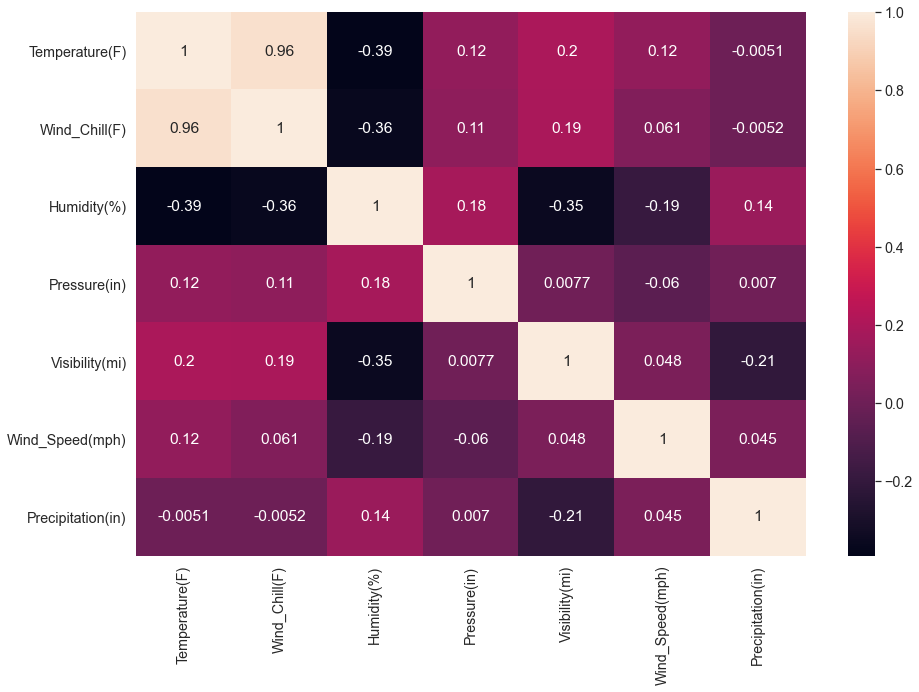

In [211]:
sns.heatmap(data = df1.corr(),annot = True)

## ----------------------------------------------------------------------------------------------------------------------------------


## 24 - Accidents rate Incidents when there is a Junction


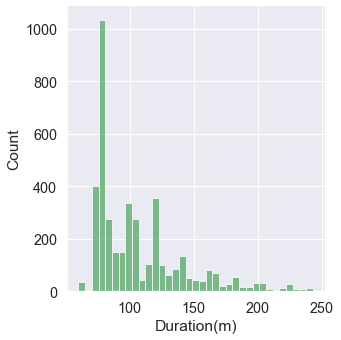

In [212]:
sns.displot(data = df[(df['Junction'] == True) & (df['Descripe'] == 'Incident')] , x = 'Duration(m)',color = 'g')

<AxesSubplot:xlabel='Duration(m)', ylabel='Density'>

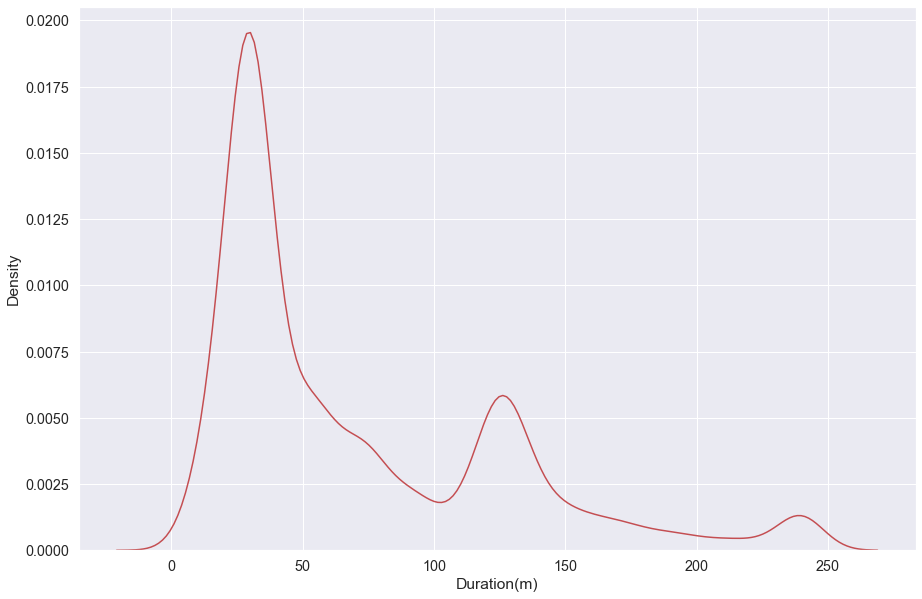

In [213]:
sns.kdeplot(data = df[(df['Junction'] == True) & (df['Descripe'] == 'Accident')] , x = 'Duration(m)',color = 'r')

## ----------------------------------------------------------------------------------------------------------------------------------


## 25- the distance ratio in the rain weather on in Florida

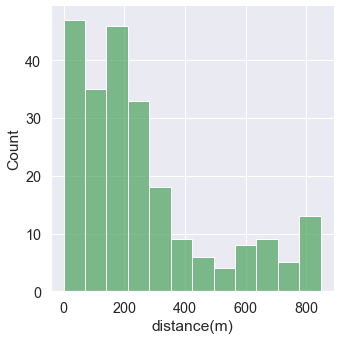

In [214]:
sns.displot(data = df[(df['State_name'] == 'Florida') & (df['Weather_Condition'] == 'Rain')] , x = 'distance(m)',color = 'g')